In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape #70k images each having 784 features : 28 X 28 pixels, each pixel intensity : 0(white) to 255(black) 

(70000, 784)

In [6]:
y.shape

(70000,)

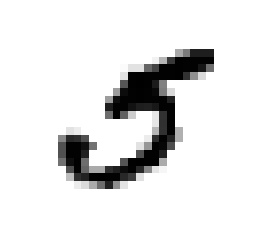

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [13]:
#MNIST DATASET is already split into training(first 60k) and testing data (last 10k)

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] #shuffles the training data

In [27]:
#practicing to classify into 5 and not-5, binary classification

In [28]:
y_train_5 = (y_train == 5) #true for all 5s, false for others
y_test_5 = (y_test == 5)

In [29]:
#use Stochastic Gradient Descent classifier from sklearn

In [83]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\SONY\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [31]:
sgd_clf.predict([some_digit]) #it is 5 so True is returned

array([ True], dtype=bool)

In [32]:
#Performance Measure

In [33]:
#Custom Cross Validation 

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96365
0.961
0.9647


In [35]:
#using sklearn cross validation

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy" ) #use accuracy to prove that it is not the best measurement
#we get 96% accuracy in 3 iterations


array([ 0.96365,  0.961  ,  0.9647 ])

In [38]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [39]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.91035,  0.90735,  0.91125])

In [41]:
# we get 90% accuracy, reason being, only 10% of data is '5'. Hence, 'accuracy' is not the best performance measurement in this case

In [42]:
#Confusion Matrix

In [43]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)


array([[53530,  1049],
       [ 1164,  4257]], dtype=int64)

In [45]:
y_train_perfect_predictions = y_train_5

In [46]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.80229928382962679

In [48]:
recall_score(y_train_5, y_train_pred) #true positive rate

0.78527946873270615

In [49]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) #79%

0.79369814486808987

In [50]:

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 125511.36751568])

In [52]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [53]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([False], dtype=bool)

In [54]:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [55]:
y_scores.shape

(60000, 2)

In [56]:
#issue 9589

In [57]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [58]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

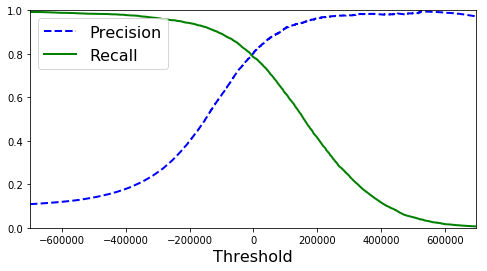

In [60]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])

plt.show()

In [63]:

(y_train_pred == (y_scores > 0)).all()
y_train_pred_90 = (y_scores > 70000)


In [64]:
precision_score(y_train_5, y_train_pred_90)

0.88883518608023204

In [65]:
recall_score(y_train_5, y_train_pred_90)

0.6784726065301605

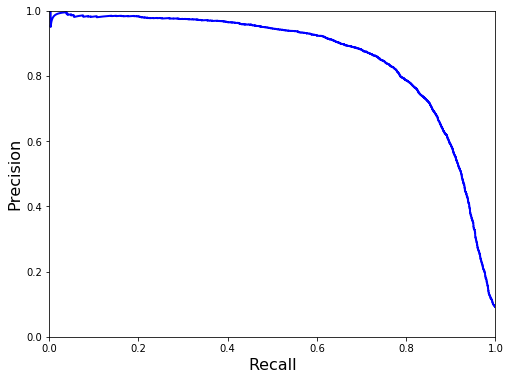

In [68]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

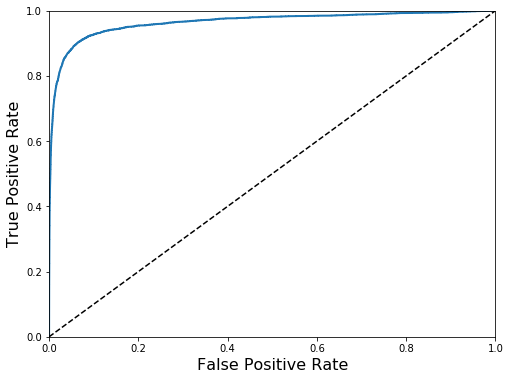

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96436911246702506

In [73]:
#roc for random forest classifier

In [74]:

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [75]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

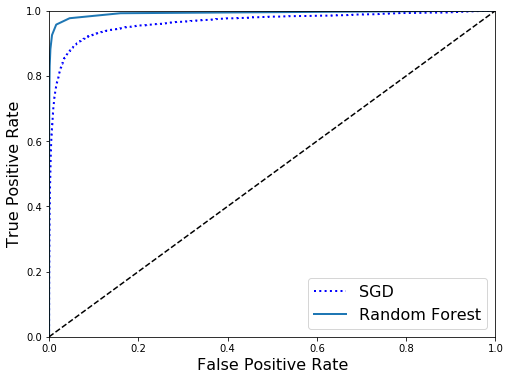

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)

plt.show()

In [77]:
roc_auc_score(y_train_5, y_scores_forest)

0.99237087588722561

In [78]:
#99% therefore random forest classifier is much better

In [79]:
#Multiclass classification

In [80]:
#OvA SGDClassifier

In [88]:
sgd_clf.fit(X_train, y_train) #y_train, not y_train_5
sgd_clf.predict([some_digit])

array([ 5.])

In [89]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-154385.69481789, -546487.7062965 , -350693.17775354,
        -227850.79925905, -212917.84196834,  125511.36751568,
        -775013.34846218, -387003.32729442, -722661.35466075,
        -645575.31435137]])

In [90]:
np.argmax(some_digit_scores)

5

In [91]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\SONY\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [92]:
len(ovo_clf.estimators_)

45

In [93]:
#Randome forest classifier, automatically classifies instances into multiple classes

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [94]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [96]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.86802639,  0.87484374,  0.86517978])

In [97]:
#applying feature scaling on inputs and then getting cross validation score

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") #we get 91%  accuracy

array([ 0.91226755,  0.91049552,  0.90718608])

In [100]:
#confusion matrix

In [101]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5740,    2,   22,    7,   10,   44,   50,    9,   32,    7],
       [   2, 6491,   48,   27,    6,   34,    7,    8,  106,   13],
       [  57,   39, 5338,   96,   70,   29,   91,   51,  171,   16],
       [  48,   43,  141, 5316,    4,  251,   36,   60,  131,  101],
       [  22,   30,   44,    6, 5363,   10,   56,   25,   72,  214],
       [  69,   42,   33,  171,   67, 4635,  112,   26,  167,   99],
       [  35,   24,   43,    2,   31,  108, 5629,    4,   42,    0],
       [  22,   23,   73,   33,   54,    9,    6, 5762,   14,  269],
       [  53,  150,   73,  149,   18,  158,   50,   23, 5002,  175],
       [  39,   31,   31,   86,  148,   40,    4,  181,   66, 5323]], dtype=int64)

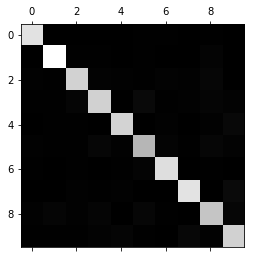

In [102]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [103]:
#most images are on the main diagonal which means they were classified correctly
#find error rates by dividing each element of confusion matrix by number of images in the corresponding class

In [104]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

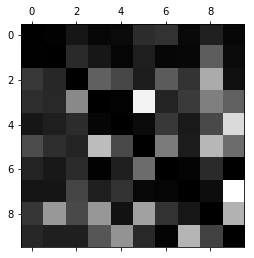

In [105]:
np.fill_diagonal(norm_conf_mx, 0) #fill diagonal with 0s to keep only the errors
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [107]:
# we can see that rows of 8 and 9 are bright. Hence, many are misclassified. 3 is misclassified as 5 a number of times.
#As it is the brightest. Similarly, 7 is misclassified as 9 a lot. 0,1,2,4,6 are pretty much classified correctly
#Note: Rows are ACTUAL images. Cols are PREDICTED images.

In [108]:
#Solution: 
#1. TO get more training data
#2. Write specific algos for 3,5
#3. Preprocess images for pattern using Scikit-Image, Pillow or OpenCV

In [110]:
def plot_digits(instances, images_per_row=10, **options):   #function to plot digits
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

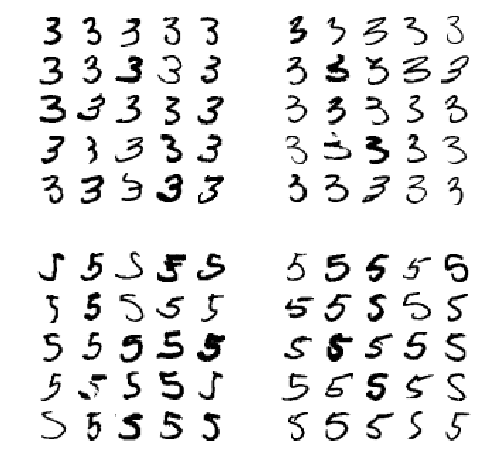

In [112]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) #correctly classified as 3s
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) #badly written 3s classified as 5s
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) #badly written 5s classified as 3s
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5) #correctly classified as 5s

plt.show()

In [113]:
#multilabel Classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) #checks if number is large, 7,8,9
y_train_odd = (y_train%2==1) #checks odd or even
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [114]:

knn_clf.predict([some_digit]) #some_digit is X[36000] which is '5'

array([[False,  True]], dtype=bool)

In [115]:
#knn_clf returns False because 5 is not 'large' and True because it is Odd.

In [116]:
#Multioutput Classification

In [117]:
#adding noise to images from MNIST

In [119]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [122]:
#function to plot digit

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [123]:
#plot a noisy(input) and a clean image(target image)

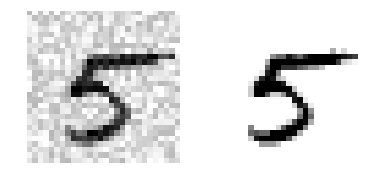

In [124]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index]) #noisy (input)
plt.subplot(122); plot_digit(y_test_mod[some_index]) #clean (target)

plt.show()

In [125]:
#training classifier to clean image

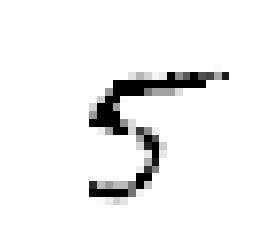

In [126]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

plot_digit(clean_digit)